## Preprocessing

In [1]:
#Data handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
%matplotlib inline


In [2]:
#this section splits the unit from the amount into seperate columns for our adjuncts
#it then converts them to real numbers instead of strings for conversion
beer_df= pd.read_csv('beer_data_cleaned8-3_with_nums.csv')
beer_df['Adjunct1Num'],beer_df['Adjunct1Unit'] = beer_df['Adjunct1Amount'].str.split(' ',1).str
beer_df['Adjunct2Num'],beer_df['Adjunct2Unit'] = beer_df['Adjunct2Amount'].str.split(' ',1).str
beer_df['Adjunct3Num'],beer_df['Adjunct3Unit'] = beer_df['Adjunct3Amount'].str.split(' ',1).str
beer_df['Adjunct4Num'],beer_df['Adjunct4Unit'] = beer_df['Adjunct4Amount'].str.split(' ',1).str
beer_df['Adjunct5Num'],beer_df['Adjunct5Unit'] = beer_df['Adjunct5Amount'].str.split(' ',1).str
from fastnumbers import fast_real
beer_df['Adjunct1Num'] = fast_real(beer_df['Adjunct1Num'])
beer_df['Adjunct2Num'] = fast_real(beer_df['Adjunct2Num'])
beer_df['Adjunct3Num'] = fast_real(beer_df['Adjunct3Num'])
beer_df['Adjunct4Num'] = fast_real(beer_df['Adjunct4Num'])
beer_df['Adjunct5Num'] = fast_real(beer_df['Adjunct5Num'])
beer_df.head()

C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (27,28,62,63,64,65,67,68,73,76,77,78,79,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  after removing the cwd from sys.path.
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: Columnar iteration

,Batch_Style,Category,Batch_size_liters,og,fg,abv,ibu,color_levibonds,mashph,Base Malt Amount,...,Adjunct1Num,Adjunct1Unit,Adjunct2Num,Adjunct2Unit,Adjunct3Num,Adjunct3Unit,Adjunct4Num,Adjunct4Unit,Adjunct5Num,Adjunct5Unit
0,All Grain,California Common,23.0,1.050,1.013,4.74,43.12,14.47,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Partial Mash,Sahti,27.0,1.076,1.020,7.46,15.26,15.71,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All Grain,German Pilsner (Pils),22.0,1.043,1.010,4.40,27.49,3.20,5.45,5.0,...,10,ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All Grain,German Pilsner (Pils),22.0,1.043,1.010,4.40,27.49,3.20,5.45,5.0,...,10,ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,All Grain,Baltic Porter,22.0,1.066,1.020,6.05,27.56,27.63,5.44,3.0,...,7,ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Imperial    59093
Metric      37623
Name: Flag, dtype: int64

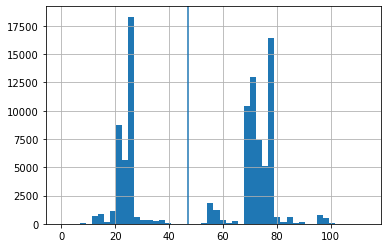

In [3]:
#this section finds a line to divide the dataset into imperial vs metric
beer_df['HighTemp'].hist(bins=50)
plt.axvline(47) #assign cutoff and create new variable to distinguish
beer_df.loc[beer_df['HighTemp'] <=47, 'Flag'] = 'Metric'
beer_df.loc[beer_df['HighTemp'] >47, 'Flag'] = 'Imperial'
beer_df['Flag'].value_counts()

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
#columns to be converted
#kg_cols = ['Base Malt Amount','SpecialtyMalt1Amount','SpecialtyMalt2Amount','SpecialtyMalt1Amount']
#gram_cols = ['hop1amount','hop2amount','hop3amount','hop4amount','hop5amount']
#celcius_cols= ['LowTemp','HighTemp']
#adj_cols= ['Adjunct1Num','Adjunct2Num','Adjunct3Num','Adjunct4Num','Adjunct5Num']
#def conversion(row):
    #if (beer_df['Flag'].equals("Metric")):
     #   kg_cols*2.2 #kg to lbs
      #  gram_cols *.035274 #grams to ounces
       # celcius_cols*(9/5)+32 #celcius to fahrenheit
    #elif beer_df['Adjunct1Unit'].equals('g'):
    #   beer_df['Adjunct1Num']*.035724 #to ounces
    #elif beer_df['Adjunct1Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
    #    beer_df['Adjunct1Num']*.033814 #to fl_oz
    #elif beer_df['Adjunct1Unit'].equals('kg'):
    #   beer_df['Adjunct1Num']*2.2 #to lbs
    #elif beer_df['Adjunct1Unit'].equals('L'):
    #    beer_df['Adjunct1Num']*.219969 #to gallons
    #elif beer_df['Adjunct2Unit'].equals('g'):
    #   beer_df['Adjunct2Num']*.035724 #to ounces
    #elif beer_df['Adjunct2Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
    #    beer_df['Adjunct2Num']*.033814 #to fl_oz
    #elif beer_df['Adjunct2Unit'].equals('kg'):
     #   beer_df['Adjunct2Num']*2.2 #to lbs
    #elif beer_df['Adjunct2Unit'].equals('L'):
     #   beer_df['Adjunct2Num']*.219969 #to gallons
    #elif beer_df['Adjunct3Unit'].equals('g'):
    #    beer_df['Adjunct3Num']*.035724 #to ounces
    #elif beer_df['Adjunct3Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
    #    beer_df['Adjunct3Num']*.033814 #to fl_oz
    #elif beer_df['Adjunct3Unit'].equals('kg'):
     #   beer_df['Adjunct3Num']*2.2 #to lbs
    #elif beer_df['Adjunct3Unit'].equals('L'):
     #   beer_df['Adjunct3Num']*.219969 #to gallons
    #elif beer_df['Adjunct4Unit'].equals('g'):
    #    beer_df['Adjunct4Num']*.035724 #to ounces
    #elif beer_df['Adjunct4Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
    #    beer_df['Adjunct4Num']*.033814 #to fl_oz
    #elif beer_df['Adjunct4Unit'].equals('kg'):
    #    beer_df['Adjunct4Num']*2.2 #to lbs
    #elif beer_df['Adjunct4Unit'].equals('L'):
    #    beer_df['Adjunct4Num']*.219969 #to gallons
    #elif beer_df['Adjunct5Unit'].equals('g'):
    #    beer_df['Adjunct5Num']*.035724 #to ounces
    #elif beer_df['Adjunct5Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
    #    beer_df['Adjunct5Num']*.033814 #to fl_oz
    #elif beer_df['Adjunct5Unit'].equals('kg'):
    #    beer_df['Adjunct5Num']*2.2 #to lbs
    #elif beer_df['Adjunct5Unit'].equals('L'):
    #    beer_df['Adjunct5Num']*.219969 #to gallons
    #return(row)

#beer_df.apply(conversion,axis=1)
        
        

In [8]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])
cat_attribs = ['Batch_Style','Category','Base Malt','SpecialtyMalt1Name', 'SpecialtyMalt2Name', 'SpecialtyMalt3Name','hop1name','hop1type','hop1timing',
                   'hop2name','hop2type','hop2timing','hop3name','hop3type','hop3timing','hop4name','hop4type','hop4timing','hop5name','hop5type','hop5timing',
                   'YeastStrain', 'Flocculation','Flag']
num_attribs = ['og','fg','abv','ibu', 'color_levibonds','mashph','LowTemp','HighTemp','Base Malt Amount','BasePPG','BaseColor','BasePercentage','SpecialtyMalt1Amount',
                 'SpecialtyMalt1PPG','SpecialtyMalt1Color','SpecialtyMalt1Percentage','SpecialtyMalt2Amount','SpecialtyMalt2PPG','SpecialtyMalt2Color','SpecialtyMalt2Percentage',
                 'SpecialtyMalt3Amount','SpecialtyMalt3PPG','SpecialtyMalt3Color','SpecialtyMalt3Percentage','hop1amount','hop1alpha','hop1time',
                 'hop1ibu','hop1percent','hop2amount','hop2alpha','hop2time','hop2ibu','hop2percent','hop3amount','hop3alpha','hop3time',
                 'hop3ibu','hop3percent','hop4amount','hop4alpha','hop4time','hop4ibu','hop4percent','hop5amount','hop5alpha','hop5time',
                 'hop5ibu','hop5percent','Attenuation','LowTemp','HighTemp']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

beer_prepared = full_pipeline.fit_transform(beer_df)


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [8]:
beer_df.isnull().sum().sort_values(ascending=False)


Unnamed: 72                             96716
Adjunct4Num                             96716
Adjunct3Num                             96716
Adjunct2Num                             96716
Adjunct5Num                             96715
                                        ...  
hop2name_ Styrian dana                      0
hop2name_ Styrian Wolf                      0
hop2name_ Styrian Savinjsky Goldings        0
hop2name_ Styrian Goldings Bobek            0
Unnamed: 0                                  0
Length: 12072, dtype: int64

In [ ]:
#k-means
#cluster = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 #   kmeans.fit(beer_df)
 #   wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), cluster)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('Clusters')
#plt.show()

In [ ]:
#kmeans = KMeans(n_clusters=4)
#kmeans.fit(beer_df)

In [ ]:
#normalized kmeans
#normalized_vectors = preprocessing.normalize(beer_df)
#scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_ for i in range(10)]
#sns.lineplot(np.arange(2, 12), scores)
#plt.xlabel('Number of clusters')
#plt.ylabel("Inertia")
#plt.title("Inertia of Cosine k-Means versus number of clusters")

In [ ]:
#normalized_kmeans = KMeans(n_clusters=4)
#normalized_kmeans.fit(normalized_vectors)